In [1]:
# 필요한 모듈 import

from xgboost import XGBRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from xgboost import plot_importance
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.inspection import PartialDependenceDisplay

In [2]:
# 구글 드라이브 연동

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# colab의 기본 폰트가 한글을 지원하지 않아 시각화시 글자가 □□□□로 보이므로 폰트를 나눔고딕으로 변경

import matplotlib.font_manager as fm
!apt-get -qq install fonts-nanum

fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
    name='NanumGothic')
fm.fontManager.ttflist.insert(0, fe)                                   # Matplotlib에 사용하고자 하는 폰트 추가.
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumGothic'})   # 폰트 설정 (크기는 10으로, 폰트는 나눔고딕으로)

Selecting previously unselected package fonts-nanum.
(Reading database ... 121920 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [4]:
x_data = pd.read_csv('/content/drive/Shareddrives/서울시 빅데이터(2022-2)/논문/2. 상권 활성화 지수 예측 모델/0) 데이터/data_x.csv')
y_data = pd.read_csv('/content/drive/Shareddrives/서울시 빅데이터(2022-2)/논문/2. 상권 활성화 지수 예측 모델/0) 데이터/data_y.csv')

In [5]:
scaler = MinMaxScaler()
x_columns_to_scale = x_data.columns.difference(['년도', '분기', '행정동코드', '표준산업분류코드'])
y_columns_to_scale = y_data.columns.difference(['년도', '분기', '행정동코드', '표준산업분류코드'])

x_data[x_columns_to_scale] = scaler.fit_transform(x_data[x_columns_to_scale])
y_data[y_columns_to_scale] = scaler.fit_transform(y_data[y_columns_to_scale])

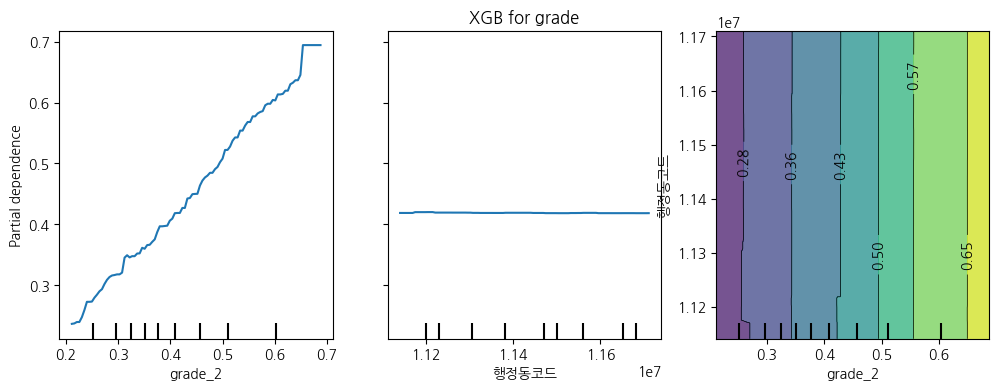

In [ ]:
target_columns = ['grade']

for predict_column in target_columns:

    y_column = f'{predict_column}_y'
    y_temp = y_data[[y_column]].values.ravel()

    total_samples = len(x_data)
    train_samples = int(0.8 * total_samples)

    x_train, x_test = x_data[:train_samples], x_data[train_samples:]
    y_train, y_test = y_temp[:train_samples], y_temp[train_samples:]

    model = XGBRegressor(n_estimators=600, random_state=42)
    model.fit(x_train, y_train)

    fig, ax = plt.subplots(figsize=(12, 4))
    ax.set_title("XGB for grade", fontsize=12)
    tree_disp = PartialDependenceDisplay.from_estimator(model, x_train, [6,2,[6,2]], ax=ax)

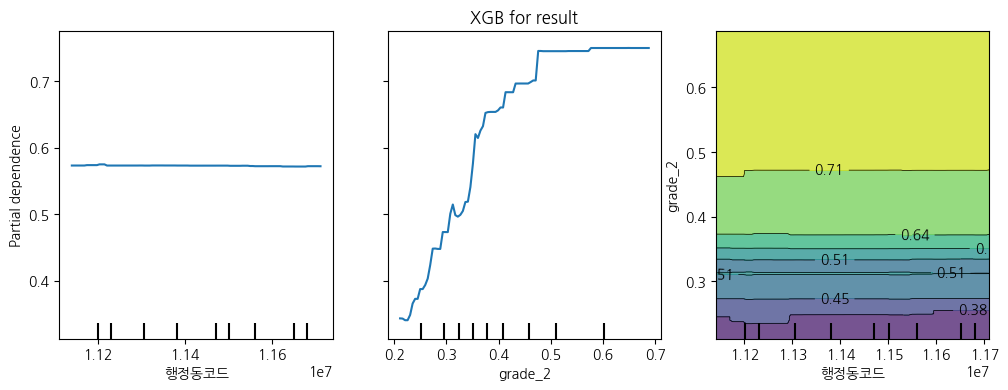

In [8]:
target_columns = ['result']

for predict_column in target_columns:

    y_column = f'{predict_column}_y'
    y_temp = y_data[[y_column]].values.ravel()

    total_samples = len(x_data)
    train_samples = int(0.8 * total_samples)

    x_train, x_test = x_data[:train_samples], x_data[train_samples:]
    y_train, y_test = y_temp[:train_samples], y_temp[train_samples:]

    model = XGBRegressor(n_estimators=200, random_state=42)
    model.fit(x_train, y_train)

    fig, ax = plt.subplots(figsize=(12, 4))
    ax.set_title("XGB for result", fontsize=12)
    tree_disp = PartialDependenceDisplay.from_estimator(model, x_train, [2,6,[2,6]], ax=ax)

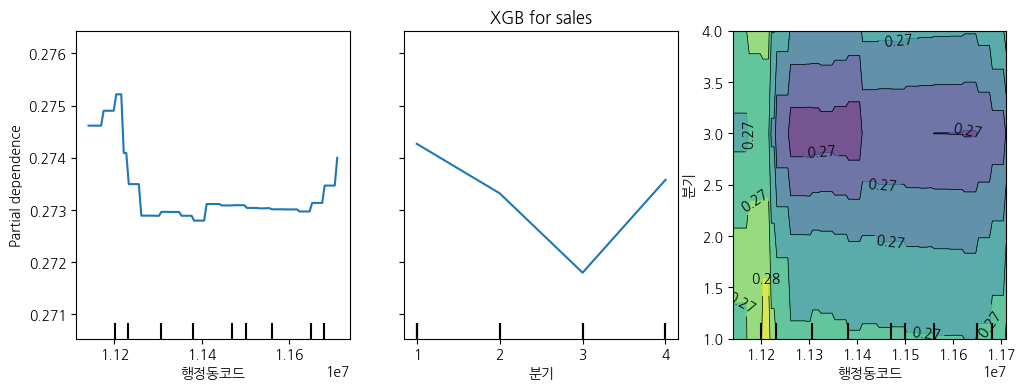

In [9]:
target_columns = ['sales']

for predict_column in target_columns:

    y_column = f'{predict_column}_y'
    y_temp = y_data[[y_column]].values.ravel()

    total_samples = len(x_data)
    train_samples = int(0.8 * total_samples)

    x_train, x_test = x_data[:train_samples], x_data[train_samples:]
    y_train, y_test = y_temp[:train_samples], y_temp[train_samples:]

    model = XGBRegressor(n_estimators=200, random_state=42)
    model.fit(x_train, y_train)

    fig, ax = plt.subplots(figsize=(12, 4))
    ax.set_title("XGB for sales", fontsize=12)
    tree_disp = PartialDependenceDisplay.from_estimator(model, x_train, [2,1,[2,1]], ax=ax)

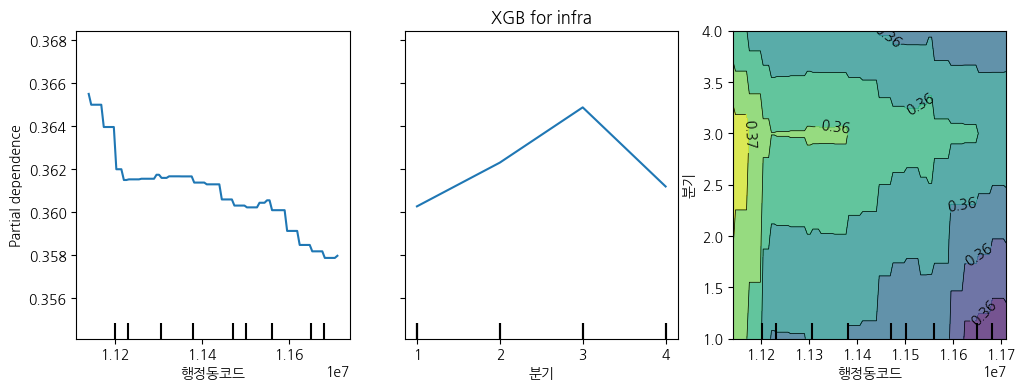

In [10]:
target_columns = ['infra']

for predict_column in target_columns:

    y_column = f'{predict_column}_y'
    y_temp = y_data[[y_column]].values.ravel()

    total_samples = len(x_data)
    train_samples = int(0.8 * total_samples)

    x_train, x_test = x_data[:train_samples], x_data[train_samples:]
    y_train, y_test = y_temp[:train_samples], y_temp[train_samples:]

    model = XGBRegressor(n_estimators=200, random_state=42)
    model.fit(x_train, y_train)

    fig, ax = plt.subplots(figsize=(12, 4))
    ax.set_title("XGB for infra", fontsize=12)
    tree_disp = PartialDependenceDisplay.from_estimator(model, x_train, [2,1,[2,1]], ax=ax)

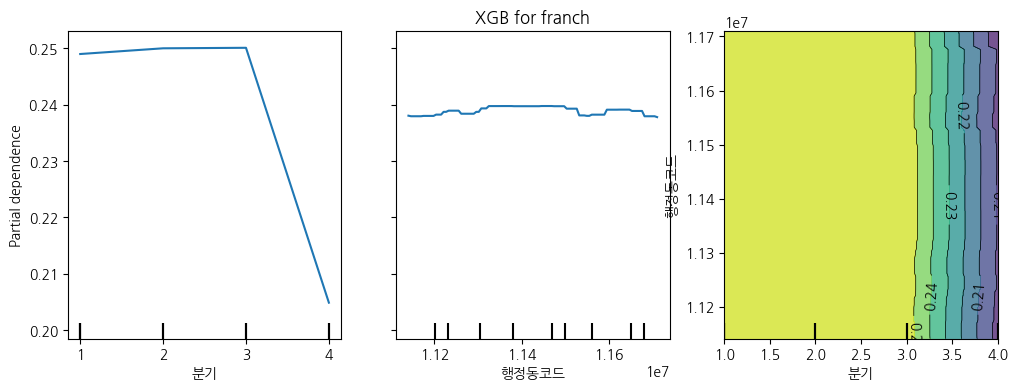

In [11]:
target_columns = ['franch']

for predict_column in target_columns:

    y_column = f'{predict_column}_y'
    y_temp = y_data[[y_column]].values.ravel()

    total_samples = len(x_data)
    train_samples = int(0.8 * total_samples)

    x_train, x_test = x_data[:train_samples], x_data[train_samples:]
    y_train, y_test = y_temp[:train_samples], y_temp[train_samples:]

    model = XGBRegressor(n_estimators=100, random_state=42)
    model.fit(x_train, y_train)

    fig, ax = plt.subplots(figsize=(12, 4))
    ax.set_title("XGB for franch", fontsize=12)
    tree_disp = PartialDependenceDisplay.from_estimator(model, x_train, [1,2,[1,2]], ax=ax)

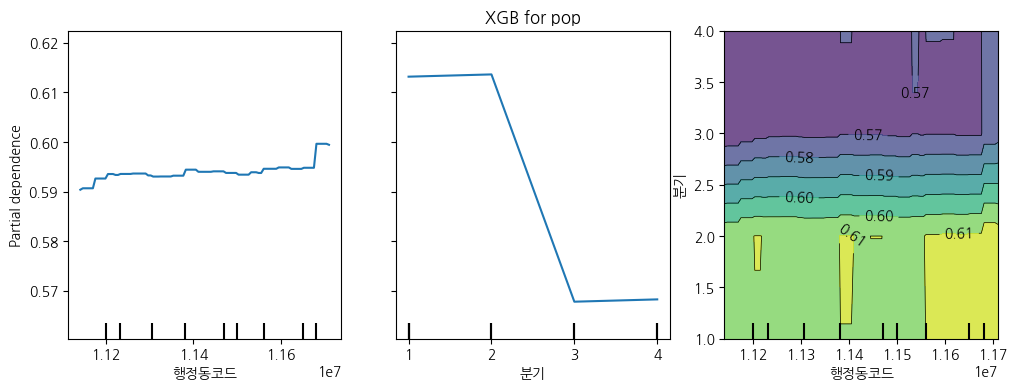

In [12]:
target_columns = ['pop']

for predict_column in target_columns:

    y_column = f'{predict_column}_y'
    y_temp = y_data[[y_column]].values.ravel()

    total_samples = len(x_data)
    train_samples = int(0.8 * total_samples)

    x_train, x_test = x_data[:train_samples], x_data[train_samples:]
    y_train, y_test = y_temp[:train_samples], y_temp[train_samples:]

    model = XGBRegressor(n_estimators=200, random_state=42)
    model.fit(x_train, y_train)

    fig, ax = plt.subplots(figsize=(12, 4))
    ax.set_title("XGB for pop", fontsize=12)
    tree_disp = PartialDependenceDisplay.from_estimator(model, x_train, [2,1,[2,1]], ax=ax)

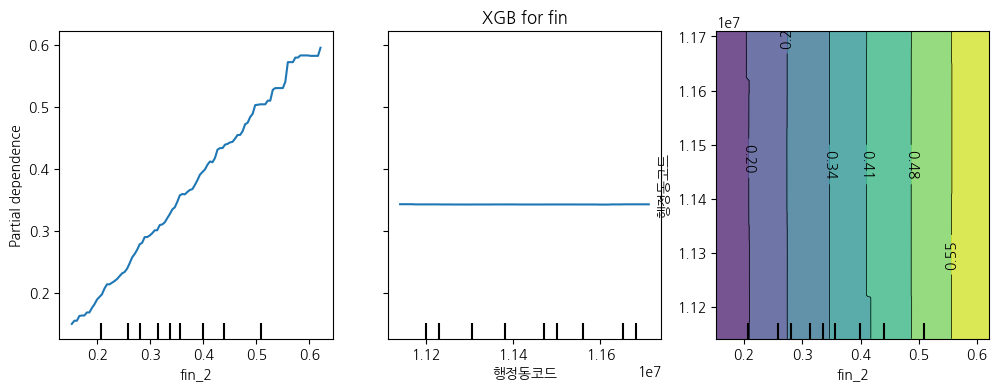

In [13]:
target_columns = ['fin']

for predict_column in target_columns:

    y_column = f'{predict_column}_y'
    y_temp = y_data[[y_column]].values.ravel()

    total_samples = len(x_data)
    train_samples = int(0.8 * total_samples)

    x_train, x_test = x_data[:train_samples], x_data[train_samples:]
    y_train, y_test = y_temp[:train_samples], y_temp[train_samples:]

    model = XGBRegressor(n_estimators=400, random_state=42)
    model.fit(x_train, y_train)

    fig, ax = plt.subplots(figsize=(12, 4))
    ax.set_title("XGB for fin", fontsize=12)
    tree_disp = PartialDependenceDisplay.from_estimator(model, x_train, [12,2,[12,2]], ax=ax)